In [1]:
import sys
import os
import time
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
sys.path.append('../../')
import numpy
import matplotlib.pyplot as plt


In [2]:
import gillespy2
from gillespy2 import BasicTauHybridSolver
from gillespy2 import NumPySSASolver
from gillespy2 import BasicODESolver

In [3]:
class ExampleDecayModel(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Automatic Switch Example")
            
            #parameters
            k1 = gillespy2.Parameter(name='k1', expression= .8)
            self.add_parameter([k1])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=100000)
            self.add_species([A])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1}, products={},
                   rate=k1)

            self.add_reaction([r1])
            self.timespan(numpy.linspace(0,10,101))

In [4]:
model = ExampleDecayModel()

In [5]:
start = time.clock()
for i in range(100):
    ode_results = model.run(solver=BasicODESolver)
end = time.clock()
ode_avg = (end - start) / 100

start = time.clock()
for i in range(100):
    hybrid_results = model.run(solver=BasicTauHybridSolver)
end = time.clock()
hybrid_avg = (end - start) / 100

start = time.clock()
for i in range(100):
    ssa_results = model.run(solver=NumPySSASolver)
end = time.clock()
ssa_avg = (end - start) / 100

In [6]:
print(ode_avg)
print(hybrid_avg)
print(ssa_avg)

0.0019591399999999994
0.20861322000000002
0.88338616


In [7]:
print('*** ODE ***')
%time ode_results = model.run(solver=BasicODESolver)
print('*** HYBRID ***')
%time hybrid_results = model.run(solver=BasicTauHybridSolver)
print('*** SSA ***')
%time ssa_results = model.run(solver=NumPySSASolver)

*** ODE ***
CPU times: user 0 ns, sys: 2.8 ms, total: 2.8 ms
Wall time: 2.02 ms
*** HYBRID ***
CPU times: user 194 ms, sys: 904 µs, total: 195 ms
Wall time: 194 ms
*** SSA ***
CPU times: user 885 ms, sys: 6 µs, total: 885 ms
Wall time: 884 ms


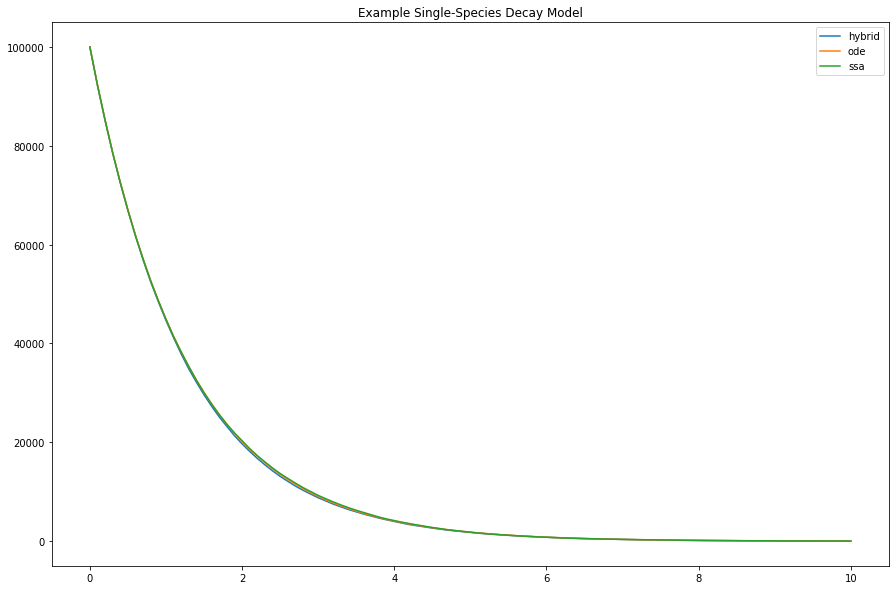

In [8]:
plt.figure(figsize=(15, 10))
start_slice = 9
end_slice = 11
for species in hybrid_results[0]:
    if species == 'time': continue
    plt.plot(hybrid_results[0]['time'], hybrid_results[0][species], label='hybrid')
for species in ode_results[0]:
    if species == 'time': continue
    plt.plot(ode_results[0]['time'], ode_results[0][species], label='ode')
for species in ssa_results[0]:
    if species == 'time': continue
    plt.plot(ssa_results[0]['time'], ssa_results[0][species], label='ssa')
plt.title('Example Single-Species Decay Model')
plt.legend(loc='best')

In [9]:
t = 10
print('at ', t, '% through simulation')
print('ODE: {0:20}'.format(ode_results[0]['A'][t]))
print('Hybrid: {0:10}'.format(hybrid_results[0]['A'][t]))
print('SSA: {0:10}'.format(ssa_results[0]['A'][t]))

at  10 % through simulation
ODE:   44932.849322677466
Hybrid: 44663.74708018352
SSA:    44921.0


In [10]:
t = 90
print('at ', t, '% through simulation')
print('ODE: {:-10.4}'.format(ode_results[0]['A'][t]))
print('Hybrid: {:-4}'.format(hybrid_results[0]['A'][t]))
print('SSA: {:-9}'.format(ssa_results[0]['A'][t]))

at  90 % through simulation
ODE:      74.66
Hybrid: 60.7976890972719
SSA:      76.0


<BarContainer object of 3 artists>

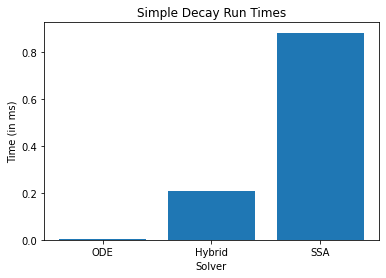

In [11]:
x = ['ODE', 'Hybrid', 'SSA']
runtimes = [ode_avg, hybrid_avg, ssa_avg]
plt.xlabel('Solver')
plt.ylabel('Time (in ms)')
plt.title('Simple Decay Run Times')
plt.bar(x, runtimes)